<h1><center> Analiza čimbenika moždanog udara</center></h1>

<img src="brain2.gif" width="750" align="center">


## Uvod u problematiku
Prema podacima svjetske zdrastvene organizacije, moždani udar je drugi najučestaliji uzročnik smrti, odgovoran za čak 11% svih smrtnih slučajeva čovječanstva. Ulogu za dobivanje moždanog udara igraju genetske predispozicije, no itekako značajan faktor jest upravo način života. <br> Ovaj esej posvećen je analizi i predviđanju faktora koji utječu na mogućnost dobivanja moždanog udara na osnovi podataka preuzetih s "https://www.kaggle.com". <br> Sadržaj eseja počinje učitavanjem i upoznavanjem s podatkovim skupom. Taj dio osmišljen je kao **interaktivni sadržaj** kako bi se čitaoc samostalnije i slobodnije upoznao s podacima. Ključni dio je analiza uzorka pacijenta koji završavamo provođenjem statističkih testova sa svrhom razvijanja modela višestruke linearne regresije. <br>

## Učitavanje podataka

In [1]:
#paketi za analizu podataka
import pandas as pd 
import numpy as np

#paketi za vizualizacije
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

#paket za random generiranje boja
import random

#paketi za spremanje vizualizacija
import plotly.express as px
import plotly.io as pio  
pio.renderers.default='notebook'

In [2]:
podaci = pd.read_csv('podaci.csv', encoding='utf-8')
podaci.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
print(podaci.shape)
print(podaci.info())
print(podaci.columns)

(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bm

Podaci se sastoje od 5110 redaka i 12 stupaca. Svaki redak predstavlja jednog pacijenta koji je jedinstveno određen svojom identifikacijskom oznakom.

### Dokumentacija

1) **id**: jedinstvena oznaka pacijenta <br>
2) **gender**: spol pacijenta, može biti "Male", "Female" or "Other" <br>
3) **age**: starost pacijenta <br>
4) **hypertension**: 0 ako pacijent nije imao hipertenziju(povišen krvni tlak), 1 ako jest <br>
5) **heart_disease**: 0 ako pacijent nije imao nikakvu srčanu bolest, 1 ako jest <br>
6) **ever_married**: da li je pacijent ikad bio u braku, može biti "No" or "Yes" <br>
7) **work_type**: tip posla, može biti "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" <br>
8) **Residence_type**: mjesto stanovanja pacijenta, može biti "Rural" or "Urban" <br>
9) **avg_glucose_level**: prosječna razina glukoze u krvi <br>
10) **bmi**: indeks tjelesne mase <br>
11) **smoking_status**: navike pušenja pacijenta, može biti "formerly smoked", "never smoked", "smokes" or "Unknown"* <br>
12) **stroke**: 1 ako je pacijent imao moždani udar ili 0 ako nije <br>
<br>
"Unknown" kod smoking_status znači da je ta informacija nedostupna za pojedinog pacijenta. <br>

### Upoznavanje s podacima

Kod analize podataka, veliku ulogu ima vizualizacija. Upravo zato, sljedećih nekoliko ćelija u nastavku su interaktivnog karaktera i omogućuju čitaocu samostalnije i slobodnije upoznavanje s podacima. <br>
Pokretanjem određene ćelije, čitaoc eseja dobiva uputu kakav unos se od njega očekuje te se nakon toga pojavi prozor u koji može unijeti vrijednost prema danoj uputi. <br>
Podsjećamo čitaoca da su mogući izbori za diskretne varijable: **gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke**, dok za neprekidne: **avg_glucose_level, bmi i age** <br>
Odsad nadalje navodimo samo očekivani input. <br>

*Napomena: naziv varijable unosi se točno kako je gore navedeno*. <br>

In [4]:
discrete = {"gender", "hypertension", "heart_disease", 
            "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"}

numeric = {"avg_glucose_level", "bmi", "age"}

#### Vrijednosti kategorijskih varijabla

Iako smo kategorije diskretnih varijabla naveli gore, njihov ispis u obliku seta omogućujemo i ovdje zbog sistematičnijeg pregleda. <br>

In [5]:
print("Unesite jednu od sljedećih varijabla:")
print(discrete)

input_ = input()


def categories(x_):
    all = set(podaci[x_])
    print(all)

if input_ in discrete:
    categories(input_)
else: 
    print("Vaš unos je nevažeći!")

Unesite jednu od sljedećih varijabla:
{'heart_disease', 'Residence_type', 'gender', 'hypertension', 'work_type', 'stroke', 'smoking_status', 'ever_married'}
gender
{'Male', 'Other', 'Female'}


Naprimjer vidimo da razlikujemo mjesto stanovanja ovisno o tome radi li se o  ruralnom ili urbanom području. Tip posla kojim se pojedina osoba bavi djelimo na posao u vladi, samozaposlen, privatni tip posla, osoba nikad bila zaposlena ili dijete, ako je osoba maloljetna.

#### Deskriptivna statistika 


In [6]:
print("Unesite jednu od sljedećih varijabla:")
print(numeric)

input_ = input()

def describe(x_):
    print(podaci[[x_]].describe().iloc[[0,1,2,3,7]])
    

if input_ in numeric:
    describe(input_)
else: 
    print("Vaš unos je nevažeći!")

Unesite jednu od sljedećih varijabla:
{'age', 'bmi', 'avg_glucose_level'}
bmi
               bmi
count  4909.000000
mean     28.893237
std       7.854067
min      10.300000
max      97.600000


Prosječna dob uzorka jest oko 43 godine. Najstariji pacijent ima 82 godine, dok najmlađi ima manje od godinu dana. <br>
Prema dostupnim medicinskim podacima, normalnom razinom glukoze u krvi kod ljudi smatramo interval između 70 mg/dl i 126 mg/dl. <br> Prosječna razina glukoze u krvi našeg uzorka je 106.148, što upada u "normalni" interval.  <br>
Prema "Adult BMI kalkulatoru", osobe s BMI vrijednosti u intervalu 18.5 - 24.9 smatraju se zdrave. Prosječna vrijednost indeksa tjelesne težine našeg uzorka pacijenta je 28.893.

#### Stupčasti dijagram 

In [8]:
print("Unesite jednu od sljedećih varijabla:")
print(discrete)

sns.set(style="darkgrid")  #pozadinska tema grafova

input_=input()

def draw_countplot(x_):
    ax = sns.countplot(
    x=x_, 
    data=podaci, 
    palette="light:b",
    );
    for p in ax.patches:  #dodavanje brojeva na vrh grafa
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50)) 

if input_ in discrete:
    draw_countplot(input_)
else: 
    print("Vaš unos je nevažeći!")

Unesite jednu od sljedećih varijabla:
{'heart_disease', 'Residence_type', 'gender', 'hypertension', 'work_type', 'stroke', 'smoking_status', 'ever_married'}
kdi
Vaš unos je navažeći!


U našem uzorku prevladavaju žene, čak njih 2994 nasprem 2115 muškaraca. Većina pacijenata nema hipertenziju, odnosno povišen tlak, nit problema sa srcem. Također, veći broj njih je nekad bio u braku. Zanimljiva je i podjela prema tipu posla. Čak njih 2925 rade privatno, dok najmanji broj njih, 22, nikad nije radio. Podjednak je broj pacijenta koji žive u gradu i na selu. Također, najveći broj je pušača, dok za 1544 pacijenta nemamo podatak o pušenju, što nas baš ne veseli. Na kraju, možda najvažniji podatak, 249 pacijenta danog uzorka imalo je moždani udar dok njih 4861 nije.

#### Graf gustoće neprekidnih varijabla

In [ ]:
print("Unesite jednu od sljedećih varijabla:")
print(numeric)

input_=input()

def draw_distribution(x_):
    #plt.xlim(-10,90)
    if(x_ == 'age'):
        plt.xlabel("Godine")
    if(x_ == 'bmi'):
        plt.xlabel("Indeks tjelesne težine")
    if(x_ == 'avg_glucose_level'):
        plt.xlabel("Prosječna razina glukoze u krvi")
    plt.xlim(min(podaci[x_]),max(podaci[x_]))
    sns.kdeplot(podaci[x_])
    plt.title('Graf gustoće', fontsize= 13)
    plt.figure(figsize=(3, 3))
    plt.show() 


if input_ in numeric:
    draw_distribution(input_)
else: 
    print("Vaš unos je navažeći!")

Iz ovog grafa čitamo npr. vjerojatnost da slučajno odabran pacijent iz našeg uzorka ima 20 godina jest oko 0.01 %.

#### Distribucija neprekidnih varijabla zajedno s moždanim udarom

In [16]:
print("Unesite jednu od sljedećih varijabla:")
print(numeric)

input_ = input()

def random_color():  
    colors = set(['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown'])
    return(random.sample(colors, 2))

def draw_distribution(x_):
    mozdani = podaci[podaci['stroke']==1][x_].fillna(0.0).astype(float)
    bez_mozdanog = podaci[podaci['stroke']==0][x_].fillna(0.0).astype(float)
    fig = ff.create_distplot([mozdani, bez_mozdanog], ['Moždani','Ne moždani'], 
                             bin_size=0.78, curve_type='normal'
                            ,colors =  [random_color()[0], random_color()[1]])
    #naslov grafa i x os
    fig.update_layout(
        title="Distribucija moždanog udara",
        xaxis_title=x_,
    )
    fig.show() #prikaz grafa

    
if input_ in numeric:
    draw_distribution(input_)
else: 
    print("Vaš unos je navažeći!")

age


Nekoliko stvari ovdje odmah primjećujemo. Očekivano, najjasniji su rezultati godina. Naime, vrlo jasno se vidi da su starije osobe podložnije moždanom udaru. Gledajući indeks tjelesne težine, gotovo sve osobe oboljele od moždanog udara nalaze se između vrijednosti 20 i 40. Što se tiče glukoze, možemo reći da je više onih s moždanim udarom i nižom razinom glukoze u krvi.

## Analiza pojedinih faktora na moždani udar

Sada kada smo se malo bolje upoznali s našim podacima, posvetimo se ključnom poglavlju ovog eseja.  <br> Stvar koju proučavamo jest (ne)povezanost pojedinih čimbenika s moždanim udarom. Najprije donosimo nekoliko vizualizacija kojim obično započinje svaka ozbiljnija analiza podataka. Zatim djelimo pacijente u dvije kategorije, ovisno o tome jesu li imali moždani udar ili ne.

In [ ]:
cor = podaci.corr()
sns.heatmap(cor, annot=True, cmap='Blues')

Analizom veoma popularnog "*heat map*" vizualnog prikaza nekoliko stvari odmah možemo uočiti. Prvo je da identifikacijske oznake pacijenta nisu korelirane ni sa čim. To je potpuno očekivano i čudili bismo se da je drugačije. Taj dio označan je najsvjetlijom bojom na mapi. Dio koji ima najveću korelaciju su godine i indeks tjelesne težine, zatim su godine i povišen krvni tlak, pa godine i srčane bolesti. U svakom slučaju, godine su značajan čimbenik.

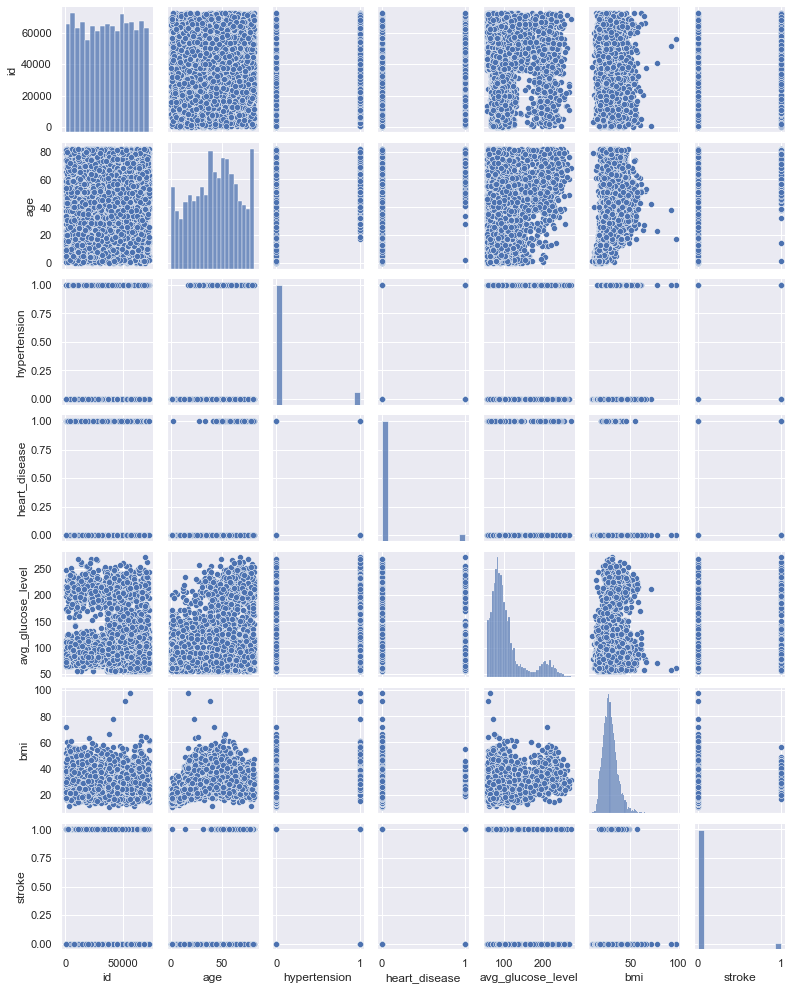

In [21]:
sns.pairplot(podaci, height=2, aspect=0.8)

S obzirom na kategorijske varijbale, nisu nam svi parovi numeričkih varijabla u vizualnom prikazu *pairplot* jednako zanimljivi. Vidimo da imamo više starijih pacijenata s moždanim udarom te također njihov indeks tjelesne težine ne prelazi 60.

#### Podjela pacijenta ovisno o tome jesu li imali moždani udar ili ne

In [22]:
pacients_stroke=podaci[podaci['stroke']==1] 
pacients_no_stroke=podaci[podaci['stroke']==0]  

#### Prosječna dob pacijenta koji su imali moždani udar nasprem onih kojih nisu

In [26]:
groups_age=podaci.groupby('stroke')['age'].mean().reset_index()
fig = px.bar(groups_age, 
             y="age", 
             x="stroke",
             width=500, 
             height=500,
             color='stroke', 
             log_y=False)

fig.show()

Ono što smo već i zaključili ranije, prosječna dob pacijenta koji su imali moždani udar je veća od onih koji nisu imali moždani.

#### Mjesto stanovanja pacijenta koji su imali moždani udar 

In [27]:
groups_residence=pacients_stroke['Residence_type'].value_counts().reset_index()

fig = px.pie(groups_residence,
             height=400,
             width=400,
             values="Residence_type", 
             names="index",
             color='index',
             color_discrete_map={'Urban':'darkmagenta',
                                 'Rural':'magenta',
                                 })

fig.update_traces(pull=0.03)
fig.show()

Gledajući samo one pacijente koji su imali moždani udar, vidimo da je više onih koje dolaze sa urbanog područja, razlika nije prevelika stoga za ovaj faktor možemo reći da nije značajan.

#### Tip posla pacijenta koji su imali moždani udar

In [28]:
groups_work=pacients_stroke['work_type'].value_counts().reset_index()

fig = px.pie(groups_work, 
             height=500,
             width=500,
             values="work_type", 
             names="index",
             color='index',
             color_discrete_map={'children':'lightcyan',
                                 'Govt_job':'cyan',
                                 'Private':'royalblue',
                                 'Self-employed':'darkblue'})

fig.update_traces(pull=0.05)
fig.show()

Jasno se vidi da više od pola ukupnog broja pacijenta oboljelih od moždanog udara su oni koji rade privatno.

#### Kategorizacija indeksa tjelesne težine
Kategorije za indeks tjelesne težine određene su prema [Adult BMI kalkulatoru](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html).

In [62]:
def bmi_category(x_):
    if x_<18.5:
        return 'Underweight'
    elif 18.5<=x_<24.9:
        return 'Normal'
    elif 24.9<=x_<29.9:
        return 'Overweight'
    elif 29.9<x_:
        return 'Obese'
    else:
        return 'None'
    
podaci['bmi_category']=podaci['bmi'].apply(bmi_category)
podaci.groupby('bmi_category').stroke.value_counts()

bmi_category  stroke
None          0.0         23
              1.0          3
Normal        0.0       1189
              1.0         36
Obese         0.0       1909
              1.0        123
Overweight    0.0       1404
              1.0         86
Underweight   0.0        336
              1.0          1
Name: stroke, dtype: int64

Ovdje vidimo omjer pacijenta koji su imali moždani udar i onih koji nisu posebno po kategorijama.

<AxesSubplot:xlabel='bmi_category', ylabel='bmi'>

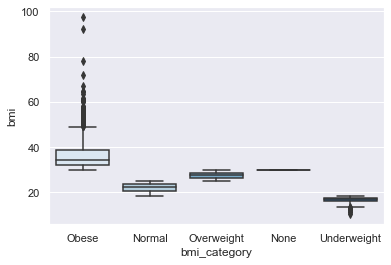

In [65]:
sns.boxplot(x='bmi_category',y='bmi',data=podaci, palette='Blues')

##ovo mi se fkt neda analizirat sad

In [68]:
podaci.drop(['bmi_category'],axis=1,inplace=True) 

KeyError: "['bmi_category'] not found in axis"

#### Navike pušenja pacijenta koji su imali moždani udar

In [29]:
groups_smoke=pacients_stroke['smoking_status'].value_counts().reset_index()

fig = px.pie(groups_smoke,
             height=500,
             width=500,
             values="smoking_status", 
             names="index",
             color='index',
             color_discrete_map={'never smoked':'yellow',
                                 'smokes':'darkyellow',
                                 'formerly smoked':'lightyellow',
                                 'smokes':'darkblue'})

fig.update_traces(pull=0.05)
fig.show()

Od svih pacijenta koji su imali moždani udar, najviše ima onih koji nikad nisu pušili. Popriličan je postotak onih za koje neznamo njihove navike po pitanju pušenja.

## Provođenje statističkih testova

### Testiranje normalnosti uzorka

Za neprekidne varijable provodimo najpoznatije testove pripadnosti normalnoj distribuciji. U svakom testu koristimo razinu značajnosti od 5 %.

#### Shapiro-Wilk test za ispitivanje normalne distribucije neprekidne varijable "age"
`Pretpostavke` <br>
Uzorci su nezavisni i jednako distribuirani. <br>
<br>
`Hipoteze`  <br>
$H_0$ = uzorak je normalno distribuiran. <br>
$H_1$ = uzorak nije normalno distribuiran.

In [206]:
from scipy.stats import shapiro

stat, p = shapiro(podaci['age'])
print('stat=%.5f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Uzorak je normalno distribuiran.')
else:
    print('Uzorak nije normalno distribuiran.')

stat=0.96724, p=0.00000
Uzorak nije normalno distribuiran.


#### D’Agostino’s  test za ispitivanje normalne distribucije neprekidne varijable "avg_glucose_level"
`Pretpostavke` <br>
Uzorci su nezavisni i jednako distribuirani. <br>
<br>
`Hipoteze`  <br>
$H_0$ = uzorak je normalno distribuiran. <br>
$H_1$ = uzorak nije normalno distribuiran.

In [207]:
from scipy.stats import normaltest

stat, p = normaltest(podaci['avg_glucose_level'])
print('stat=%.5f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Uzorak je normalno distribuiran.')
else:
    print('Uzorak nije normalno distribuiran.')

stat=1328.93579, p=0.00000
Uzorak nije normalno distribuiran.


#### Anderson-Darling  test za ispitivanje normalne distribucije neprekidne varijable "bmi"
`Pretpostavke` <br>
Uzorci su nezavisni i jednako distribuirani. <br>
<br>
`Hipoteze`  <br>
$H_0$ = uzorak je normalno distribuiran. <br>
$H_1$ = uzorak nije normalno distribuiran.

In [212]:
from scipy.stats import anderson

result = anderson(podaci['bmi'].fillna(0))

print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Uzorak je normalno distribuiran na razini značajnosti %.1f%%.' % (sl))
    else:
        print('Uzorak nije normalno distribuiran na razini značajnosti %.1f%%.' % (sl))

stat=62.382
Uzorak nije normalno distribuiran na razini značajnosti 15.0%.
Uzorak nije normalno distribuiran na razini značajnosti 10.0%.
Uzorak nije normalno distribuiran na razini značajnosti 5.0%.
Uzorak nije normalno distribuiran na razini značajnosti 2.5%.
Uzorak nije normalno distribuiran na razini značajnosti 1.0%.


Budući da niti jedna neprekidna varijabla našeg uzorka nije normalno distribuirana, ovo nas dosta ograničana u korištenju samih statističkih testova. Zato ćemo koristiti one koji nisu "osjetljivi" na normalnost podataka.

### Testovi koreliranosti kategorijskih varijabla

Kako bismo proveli testove koreliranosti kategorijskih varijabla, potrebno je vrijednosti stupaca tipa *string* konvertirati u vrijednosti tipa *int*. 

In [53]:
podaci['gender'] = pd.factorize(podaci.gender)[0]
podaci['ever_married'] = pd.factorize(podaci.ever_married)[0]
podaci['work_type'] = pd.factorize(podaci.work_type)[0]
podaci['Residence_type'] = pd.factorize(podaci.Residence_type)[0]
podaci['smoking_status'] = pd.factorize(podaci.smoking_status)[0]

podaci.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,51676,1,61.0,0,0,0,1,1,202.21,NaN,1,1
2,31112,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1


#### $\chi^2$ test za ispitivanje nezavisnot varijabla "hypertension" i "heart_disease"
`Pretpostavke` <br>
Opservacije iz kontigencijskih tablica su nezavisne. <br>
Za svaku vrijednost kategorijske varijable imamo barem 25 opservacija.<br>
`Hipoteze`  <br>
$H_0$ = uzorci su nezavisni <br>
$H_1$ = postoji zavisnost između uzorka


In [50]:
pd.crosstab(podaci['hypertension'],podaci['heart_disease'])

heart_disease,0,1
hypertension,,
0,4400,212
1,434,64


In [49]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(pd.crosstab(podaci['hypertension'],podaci['heart_disease']))
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Uzorci su nezavisni.')
else:
    print('Uzorci su zavisni.')

stat=58.33666, p=0.00000
Uzorci su zavisni.


### Ispitivanje statistički značajnih varijabla ???? 

Koristeći se statističkim metodama, ispitujemo utječe li povišen krvi tlak na prosječnu razinu glukoze u krvi. U tu svrhu definiramo nultu i alternativnu hipotezu.

$H_0$ = prosječna razina glukoze u krvi je **ista** kod pacijenata s povišenim krvim tlakom i onih bez povišenog krvog tlaka

$H_1$ = prosječna razina glukoze u krvi je **različita** kod pacijenata s povišenim krvim tlakom i onih bez povišenog krvog tlaka


In [51]:
povisen_tlak = podaci[podaci["hypertension"] == 1]
normalan_tlak = podaci[podaci["hypertension"] == 0]


povisen_tlak_mean = povisen_tlak ["avg_glucose_level"].mean()
normalan_tlak_mean = normalan_tlak["avg_glucose_level"].mean()

print("Broj pacijenta s povišenim krvnim tlakom:", len(povisen_tlak))
print("Broj pacijenta s normalnim krvnim tlakom:", len(normalan_tlak))

print("Prosječna razine glukoze u krvi kod pacijenta s povišenim krvnim tlakom:", povisen_tlak_mean)
print("Prosječna razina glukoze u krvi kod pacijenta s normalnim krvnim tlakom:", normalan_tlak_mean )

Broj pacijenta s povišenim krvnim tlakom: 498
Broj pacijenta s normalnim krvnim tlakom: 4612
Prosječna razine glukoze u krvi kod pacijenta s povišenim krvnim tlakom: 130.18899598393577
Prosječna razina glukoze u krvi kod pacijenta s normalnim krvnim tlakom: 103.55171509106651


## Zaključak analize podataka

Nakon svih ovih vizualizacija, možemo reći da neki faktori imaju veći utjecaj od drugih pri predviđanju moždanog udara. Konkretno, zaključujemo da su to: **godine, indeks tjelesne težine, prosječna razine glukoze u krvi, problemi sa srcem i povišen krvni tlak**. Faktori poput bračnog statatusa, tipa posla i mjesta stanovanja vjerojatno nisu toliko direktno povezani s moždanim udarom. Na temelju izdvojenih čimbenika, koji imaju smisla i s medicinske strane, razvijamo model s mogućnošću predviđanju dobivanja moždanog udara. Također, mičemo stupac u kojem se nalaze identifikacijske oznake pacijenta jer za potrebe ovog eseja on nam nije od prevelike važnosti.

In [54]:
podaci.drop(['id', 'gender','work_type','ever_married','Residence_type','smoking_status'],axis=1,inplace=True) 

## Višestruka linearna regresija

### Priprema podataka za razvijanje modela

Iako je zapravo početni oblik podataka poprilično zadovoljavajuć, potrebno je napraviti sitnije modifikacije kako bismo pristupili samom problemu razvijanja modela. Slično kao što smo već kod provođenja statističkih testova morali vrijednosti tipa *string* zamjeniti s brojevima.

In [69]:
podaci.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0.0,1.0,228.69,36.600000,1.0
1,61.0,0.0,0.0,202.21,30.972397,1.0
2,80.0,0.0,1.0,105.92,32.500000,1.0
3,49.0,0.0,0.0,171.23,34.400000,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0


In [56]:
podaci.isnull().sum()

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

<AxesSubplot:>

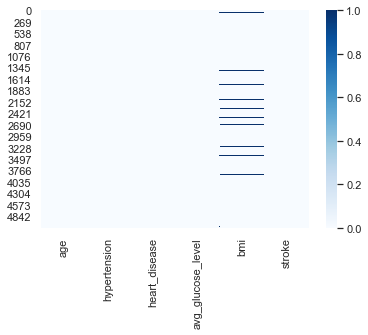

In [57]:
sns.heatmap(podaci.isnull(),cmap='Blues')

### Simulacija nedostajućih vrijednosti za indeks tjelesne težine

Vidimo da imamo 201 nedostajuću vrijednost za indeks tjelesne težine. Postoji nekoliko načina na koji ovo možemo riješiti. Najjednostavniji je da uklonimo te opservacije. Međutim, to nije baš poželjan način jer moguće da te opservacija svejedno sadrže neke bitne informacije za druge varijable. Onaj malo zahtjevniji i češći način u ovakvim situacijama jest da, koristeći neke atraktivne metode ili algoritme, vrijednosti tipa *NaN* zamjenimo nečim drugim. U ovom eseju, koristimo tzv. *Multiple Imputation by Chained Equations* algoritam. Ovaj algoritam, svaki stupac u kojem se nalaze neke *NaN* vrijednosti gleda kao zavisnu varijablu linearne regresije koju razvija na postojećim podacima. Nakon toga, koristeći model koji je razvio, jednostavno za svaku *Nan* vrijednost predviđa vrijednost zavisne varijable.


In [58]:
from fancyimpute import IterativeImputer as MICE

MICE().fit_transform(podaci)

array([[ 67.        ,   0.        ,   1.        , 228.69      ,
         36.6       ,   1.        ],
       [ 61.        ,   0.        ,   0.        , 202.21      ,
         30.97239742,   1.        ],
       [ 80.        ,   0.        ,   1.        , 105.92      ,
         32.5       ,   1.        ],
       ...,
       [ 35.        ,   0.        ,   0.        ,  82.99      ,
         30.6       ,   0.        ],
       [ 51.        ,   0.        ,   0.        , 166.29      ,
         25.6       ,   0.        ],
       [ 44.        ,   0.        ,   0.        ,  85.28      ,
         26.2       ,   0.        ]])

In [59]:
podaci=pd.DataFrame(data=MICE().fit_transform(podaci), columns=podaci.columns, index=podaci.index)

podaci.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0.0,1.0,228.69,36.600000,1.0
1,61.0,0.0,0.0,202.21,30.972397,1.0
2,80.0,0.0,1.0,105.92,32.500000,1.0
3,49.0,0.0,0.0,171.23,34.400000,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0


<AxesSubplot:>

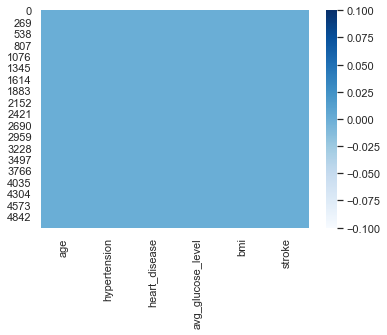

In [60]:
sns.heatmap(podaci.isnull(),cmap='Blues')

MICE algoritmom riješili smo se *NaN* vrijednosti. Inače, algoritam ima veliku primjenu i često se koristi u praksi jer koristi cijeli podatkovni set, a ne samo određene stupce, kao što to čini isto popularna *mean* metoda. Sada smo spremni posvetiti se modelu višestruke linearne regresije.

## Prediktivne metode

In [176]:
X = podaci[['age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease']]  #nezavisan dio
y = podaci['stroke']  #zavisna varijabla

Djelimo podatke u dobro poznati **80:20** omjer. 80% svih podataka koristimo za treniranje modela, dok preostalih 20% posvećujemo testiranju i analizi točnosti modela.

In [179]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y) #ovo mozda jos nacrtati

### Regresijski model

In [187]:
from sklearn import linear_model
linear_model = linear_model.LinearRegression()
linear_model.fit(X, y)

LinearRegression()

In [188]:
linear_model.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [189]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

linear_model.score(x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       972
         1.0       0.14      0.18      0.16        50

    accuracy                           0.91      1022
   macro avg       0.55      0.56      0.56      1022
weighted avg       0.92      0.91      0.91      1022

[[918  54]
 [ 41   9]]


0.06886605766032627

In [210]:
class patient:
    age = 0
    bmi=0
    glucose_level=0
    hypertension=0
    heart_disease=0 
    

In [212]:
new_patient = patient()

print("Koliko imate godina?")
new_patient.age=input()

print("Koliko iznosi Vaš indeks tjelesne težine?")
new_patient.bmi=input()

print("Kolika je vrijednost Vaše prosječne razine glukoze u krvi?")
new_patient.glucose_level=input()

print("Ukoliko imate problema s povišenim krvim tlakom unesite 1, inače 0.")
new_patient.hypertension=input()

print("Ukoliko imate problema sa srcem unesite 1, inače 0.")
new_patient.heart_disease=input()

probability = linear_model.predict([[int(new_patient.age),
                                     int(new_patient.bmi),
                                     int(new_patient.glucose_level),
                                     int(hypertension),
                                     int(new_patient.heart_disease)]])
probability = abs(probability)*100
print('Vaše šanse za dobivanje moždanog udara iznose %.5f%%.' % (probability))

Koliko imate godina?
22
Koliko iznosi Vaš indeks tjelesne težine?
18
Kolika je vrijednost Vaše prosječne razine glukoze u krvi?
121
Ukoliko imate problema s povišenim krvim tlakom unesite 1, inače 0.
0
Ukoliko imate problema sa srcem unesite 1, inače 0.
0
Vaše šanse za dobivanje moždanog udara iznose 2.14183%.


### Decision tree learning model

In [191]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
y_pred=lm.predict(x_test)

Naravno, želimo ispitati točnost modela. 

In [192]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

tree_model.score(x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       972
         1.0       0.17      0.22      0.19        50

    accuracy                           0.91      1022
   macro avg       0.57      0.58      0.57      1022
weighted avg       0.92      0.91      0.92      1022

[[920  52]
 [ 39  11]]


0.9099804305283757

In [205]:
print("Koliko imate godina?")
age=input()

print("Koliko iznosi Vaš indeks tjelesne težine?")
bmi=input()

print("Kolika je vrijednost Vaše prosječne razine glukoze u krvi?")
glucose=input()

print("Ukoliko imate problema s povišenim krvim tlakom unesite 1, inače 0.")
hypertension=input()

print("Ukoliko imate problema sa srcem unesite 1, inače 0.")
heart=input()

probability = tree_model.predict([[int(age),int(bmi),int(glucose),int(hypertension),int(heart)]])
probability = abs(probability)*100
print('Vaše šanse za dobivanje moždanog udara iznose %.5f%%.' % (probability))

Koliko imate godina?
70
Koliko iznosi Vaš indeks tjelesne težine?
60
Kolika je vrijednost Vaše prosječne razine glukoze u krvi?
140
Ukoliko imate problema s povišenim krvim tlakom unesite 1, inače 0.
1
Ukoliko imate problema sa srcem unesite 1, inače 0.
1
Vaše šanse za dobivanje moždanog udara iznose 0.00000%.


### Literatura
https://www.w3schools.com/python/python_ml_train_test.asp <br>
https://seaborn.pydata.org<br>
https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/ <br>
https://medlineplus.gov/ency/patientinstructions/000966.htm <br>
https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc <br>
https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b <br>
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset <br>
https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html <br>
https://towardsdatascience.com/statistical-significance-with-the-help-of-python-1fbb318ce216#_=_ <br>
https://scitechdaily.com/jet-fuel-on-the-evolution-of-the-brain-hunting-in-savanna-like-goldilocks-landscapes-may-have-lead-to-higher-intelligence/ <br>


### Paketi koje sam dodatno instalirala preko terminala
ploty <br>
ipywidgets <br>
fancyimpute <br>